# Mathematical Underpinnings - Lab 4

In [1]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, pearsonr
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import mutual_info_score
import seaborn as sns
import pandas as pd

## Task 1

### a)

#### bp 1)

In [6]:
# a heatmap
# you may use pcolormesh function and draw a heatmap for a sample
# or draw a heatmap for a teoretic density function

# I give you an answer to that task, because it may take too much time to do it during labs. 

In [2]:
def plot_xyz(data_2d, nbins=300):
    x = data_2d[:,0]
    y = data_2d[:,1]
    k = gaussian_kde([x, y])
    xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    return xi, yi, zi

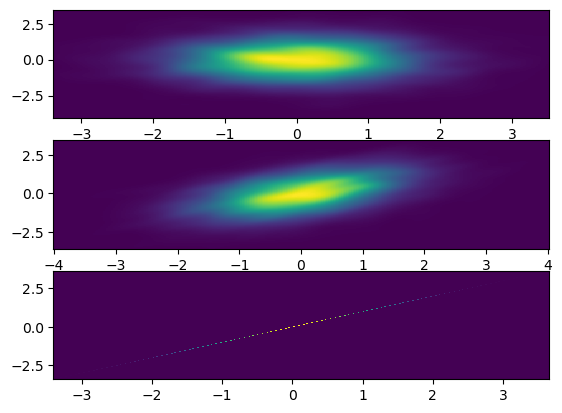

In [3]:
fig, axs = plt.subplots(3)

n = 5000

data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0], [0, 1]]), n)
xi_0, yi_0, zi_0 = plot_xyz(data_2d)
data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0.5], [0.5, 1]]), n)
xi_1, yi_1, zi_1 = plot_xyz(data_2d)
data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 1], [1, 1]]), n)
xi_2, yi_2, zi_2 = plot_xyz(data_2d)
 
# Make the plot
axs[0].pcolormesh(xi_0, yi_0, zi_0.reshape(xi_0.shape), shading='auto')
axs[1].pcolormesh(xi_1, yi_1, zi_1.reshape(xi_1.shape), shading='auto')
axs[2].pcolormesh(xi_2, yi_2, zi_2.reshape(xi_2.shape), shading='auto')
plt.show()

#### bp 2)

In [5]:
def generate_data(rho):
    return np.random.multivariate_normal(np.zeros(2), np.array([[1, rho], [rho, 1]]), n)

In [10]:
generate_data(0.5)[:,0]

array([-0.31337142,  0.34464219,  1.16860744, ..., -0.24212972,
       -0.08349523,  2.46953564])

In [51]:
# pearsonr - Pearson correlation
# mutual_info_classif - MI (I haven't checked if it works correctly, but it seems to; 
#                           for sure sklearn.metrics.mutual_info_score doesn't do what we want)
def compute_pearson_mutual_info(rho):
    data = generate_data(rho)
    res = {"rho": rho}
    X = data[:,0]
    Y = data[:,1]
    res["pearson"] =  pearsonr(X, Y)[0]
    bins_X = np.linspace(min(X), max(X), 10)
    X_digitized = np.digitize(X, bins_X)

    bins_Y = np.linspace(min(Y), max(Y), 10)
    Y_digitized = np.digitize(Y, bins_Y)
    res["MIS"] =  mutual_info_score(X_digitized, Y_digitized)
    return res


In [52]:
for rho in np.linspace(0, 1, 11):
    print(f"{compute_pearson_mutual_info(rho)}")

{'rho': 0.0, 'pearson': -0.0018654865238670743, 'MIS': 0.005220318304424893}
{'rho': 0.1, 'pearson': 0.08419660862869743, 'MIS': 0.00872290150414589}
{'rho': 0.2, 'pearson': 0.17870400915886914, 'MIS': 0.019967703710339083}
{'rho': 0.30000000000000004, 'pearson': 0.2676596887956367, 'MIS': 0.03890100564743095}
{'rho': 0.4, 'pearson': 0.3951798793706063, 'MIS': 0.08209343703095308}
{'rho': 0.5, 'pearson': 0.5056532824978581, 'MIS': 0.13041488704673077}
{'rho': 0.6000000000000001, 'pearson': 0.6078975150087373, 'MIS': 0.2032159246842174}
{'rho': 0.7000000000000001, 'pearson': 0.6838773870887188, 'MIS': 0.27953160917177}
{'rho': 0.8, 'pearson': 0.8092971293938822, 'MIS': 0.4489356059269769}
{'rho': 0.9, 'pearson': 0.8987982458908992, 'MIS': 0.6390011165335299}
{'rho': 1.0, 'pearson': 0.9999999999999981, 'MIS': 1.5952308755006983}


#### bp 3)

In [58]:
N = 100
res_df = []
for i in range(N):
    for rho in np.linspace(0, 1, 11):
        if rho == 1:
            break
        res_df.append(compute_pearson_mutual_info(rho))
res_df = pd.DataFrame(res_df)

In [59]:
import plotly.express as px
fig = px.box(res_df, x="rho", y="MIS")
fig.show()

#### bp 4)

A hint: note that mutual information between two correlated normal distributions i.e. when $(X, Y)\sim \mathcal{N}((0,0)', \Sigma)$ and
$$\Sigma = \begin{pmatrix}
        \sigma_x^2 & \rho \\ \rho & \sigma_y^2
    \end{pmatrix}$$
equals
$$I(X,Y) = \frac{1}{2}\log \left(\frac{\sigma_x^2\sigma_y^2}{\sigma_x^2\sigma_y^2 - \rho^2}\right).$$

In [61]:
res_df["rho_transformed"] = -np.log((1-res_df["rho"]**2))/2
res_df["rho_hat_transformed"] = -np.log((1-res_df["pearson"]**2))/2

In [66]:
px.scatter(res_df, x="rho_transformed", y="MIS")

In [67]:
px.scatter(res_df, x="rho_hat_transformed", y="MIS")

### b)

#### bp 1)

In [11]:
# again: this is too time consuming so here is an answer

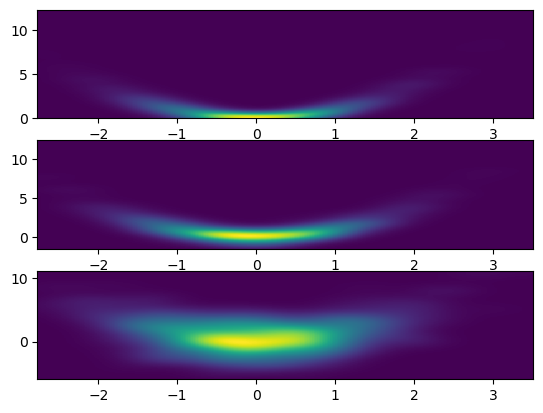

In [68]:
fig, axs = plt.subplots(3)

n = 1000
x = np.random.normal(0, 1, n)

data_2d = np.array([x, x**2 + np.random.normal(0, 0, n)]).T
xi_0, yi_0, zi_0 = plot_xyz(data_2d)
data_2d = np.array([x, x**2 + np.random.normal(0, 0.5, n)]).T
xi_1, yi_1, zi_1 = plot_xyz(data_2d)
data_2d = np.array([x, x**2 + np.random.normal(0, 2, n)]).T
xi_2, yi_2, zi_2 = plot_xyz(data_2d)
 
# Make the plot
axs[0].pcolormesh(xi_0, yi_0, zi_0.reshape(xi_0.shape), shading='auto')
axs[1].pcolormesh(xi_1, yi_1, zi_1.reshape(xi_1.shape), shading='auto')
axs[2].pcolormesh(xi_2, yi_2, zi_2.reshape(xi_2.shape), shading='auto')
plt.show()

#### bp 2) and 3)

In [69]:

def compute_pearson_mutual_info(rho):
    data = np.array([x, x**2 + np.random.normal(0, rho, n)]).T
    res = {"rho": rho}
    X = data[:,0]
    Y = data[:,1]
    res["pearson"] =  pearsonr(X, Y)[0]
    bins_X = np.linspace(min(X), max(X), 10)
    X_digitized = np.digitize(X, bins_X)

    bins_Y = np.linspace(min(Y), max(Y), 10)
    Y_digitized = np.digitize(Y, bins_Y)
    res["MIS"] =  mutual_info_score(X_digitized, Y_digitized)
    return res

In [70]:
compute_pearson_mutual_info(0.5)

{'rho': 0.5, 'pearson': 0.059738656703556825, 'MIS': 0.49408081343233184}

In [71]:
for rho in np.linspace(0, 1, 11):
    print(f"{compute_pearson_mutual_info(rho)}")

{'rho': 0.0, 'pearson': 0.062364534400542536, 'MIS': 0.45594037906009693}
{'rho': 0.1, 'pearson': 0.061620966196350435, 'MIS': 0.5225903801880174}
{'rho': 0.2, 'pearson': 0.06224672455176246, 'MIS': 0.6203220099092115}
{'rho': 0.30000000000000004, 'pearson': 0.06728775687180251, 'MIS': 0.606158478980802}
{'rho': 0.4, 'pearson': 0.05904314702147085, 'MIS': 0.5382712626689827}
{'rho': 0.5, 'pearson': 0.03781536517640946, 'MIS': 0.4859280969654748}
{'rho': 0.6000000000000001, 'pearson': 0.055806966383398, 'MIS': 0.4308487554237806}
{'rho': 0.7000000000000001, 'pearson': 0.02370477078305311, 'MIS': 0.38006406971461637}
{'rho': 0.8, 'pearson': 0.041917758159952814, 'MIS': 0.33846186164967834}
{'rho': 0.9, 'pearson': 0.06335283191959168, 'MIS': 0.32520646375164275}
{'rho': 1.0, 'pearson': 0.06140645455420671, 'MIS': 0.31273650292177363}


In [72]:
N = 100
res_df = []
for i in range(N):
    for rho in np.linspace(0, 1, 11):
        if rho == 1:
            break
        res_df.append(compute_pearson_mutual_info(rho))
res_df = pd.DataFrame(res_df)

In [73]:
fig = px.box(res_df, x="rho", y="MIS")
fig.show()

## Task 2

### a)

In [11]:
from scipy.stats import chi2_contingency

In [18]:
def ind_test(X, Y, stats = "mi"):
    n = len(X)
    bins_X = np.linspace(min(X), max(X), 10)
    X_digitized = np.digitize(X, bins_X)
    bins_Y = np.linspace(min(Y), max(Y), 10)
    Y_digitized = np.digitize(Y, bins_Y)
    
    if stats == "mi":
        mi = mutual_info_score(X_digitized, Y_digitized)
        stat_value = 2*n*mi
    elif stats == "chi2":
        contingency = pd.crosstab(X_digitized, Y_digitized)
        stat_value = chi2_contingency(contingency)[0]
    
    p_value = chi2.sf(stat_value, 9 ** 2)

    return stat_value, p_value

### b)

In [35]:
def permutation_ind_test(X, Y, B=50):
    n = len(X)
    bins_X = np.linspace(min(X), max(X), 10)
    X_digitized = np.digitize(X, bins_X)
    bins_Y = np.linspace(min(Y), max(Y), 10)
    Y_digitized = np.digitize(Y, bins_Y)
    
    mi_org = mutual_info_score(X_digitized, Y_digitized)
    
    mi_B = np.zeros(B)
    for i in range(B):
        mi_B[i] = mutual_info_score(np.random.permutation(X_digitized), Y_digitized)
    
    p_value = (1 + np.sum(mi_org <= mi_B)) / (1 + B) 
    
    return 2 * n * mi_org, p_value

### c)

**Independent r.v.**

A hint: two discretized independent normal random variables (or any two independent discrete r.v.)

In [21]:
# independent r.v. - we expect that our tests don't reject the null hypothesis
data_ind = generate_data(0)
X_ind = data_ind[:,0]
Y_ind = data_ind[:,1]

In [22]:
ind_test(X_ind, Y_ind, stats = "mi")

(57.78093910115075, 0.9762263677017315)

In [24]:
ind_test(X_ind, Y_ind, stats = "chi2")

(61.36873464980865, 0.9489433149539783)

In [26]:
import warnings
warnings.filterwarnings('ignore')

In [36]:
permutation_ind_test(X_ind, Y_ind)

(57.78093910115075, 0.7254901960784313)

**Dependent r.v.**

A hint: two discretized dependent normal random variables (or two categorical wuch that we enforce $X=Y$ for a subset of observations)

In [30]:
# independent r.v. - ideally we will reject the null hypothesis
# independent r.v. - we expect that our tests don't reject the null hypothesis
data_dep = generate_data(0.5)
X_dep = data_dep[:,0]
Y_dep = data_dep[:,1]

In [31]:
ind_test(X_dep, Y_dep, stats = "mi")

(1226.3743641146125, 5.317710574713423e-204)

In [33]:
ind_test(X_dep, Y_dep, stats = "chi2")

(1588.5324038831095, 3.281687851656203e-278)

In [37]:
permutation_ind_test(X_dep, Y_dep)

(1226.3743641146125, 0.0196078431372549)